In [1]:
# Import necessary libraries

import pandas as pd
import sqlite3
from fuzzywuzzy import fuzz
import re
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

C:\Users\mdram\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
# Read the data from the previous 3 milestone.
bookfile_df = pd.read_csv("Books_cleaned.csv")
bookweb_df = pd.read_csv("Website_Books_cleaned_Milestone_3.csv")
bookapi_df = pd.read_csv("API_Books_cleaned_Milestone_4.csv")
lenfile_df = bookfile_df.shape[0]             # Calculate the number of rows in the flat file
lenweb_df = bookweb_df.shape[0]               # Calculate the number of rows in the web file
lenapi_df = bookapi_df.shape[0]               # Calculate the number of rows in the api file

#### Book file dataframe.

In [3]:
bookfile_df.head()

,Unnamed: 0,Book Name,authors,Average Rating,isbn,isbn13,Language,Number of Pages,Ratings Count,text_reviews_count,Publication Date,Publisher
0,0,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling,4.57,439785960,9.780440e+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.
1,1,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling,4.49,439358078,9.780440e+12,eng,870,2153167,29221,9/1/2004,Scholastic Inc.
2,2,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.780440e+12,eng,352,6333,244,11/1/2003,Scholastic
3,3,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling,4.56,043965548X,9.780440e+12,eng,435,2339585,36325,5/1/2004,Scholastic Inc.
4,4,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling,4.78,439682584,9.780440e+12,eng,2690,41428,164,9/13/2004,Scholastic


In [4]:
bookfile_df.shape

(10348, 12)

There are 10348 rows and 12 columns

In [5]:
## Rename the columns names
bookfile_df = bookfile_df.rename(columns={"isbn": "ISBN_10", "isbn13": "ISBN_13", "Book Name": "Book_Name", "authors": "Author","Average Rating":"File_Average_Rating","Ratings Count":"Ratings_Count"})
bookfile_df.columns

Index(['Unnamed: 0', 'Book_Name', 'Author', 'File_Average_Rating', 'ISBN_10',
       'ISBN_13', 'Language', 'Number of Pages', 'Ratings_Count',
       'text_reviews_count', 'Publication Date', 'Publisher'],
      dtype='object')

In [6]:
for x in range(0, lenweb_df-1):
# Remove unnessary spaces and data in Book name and author columns
    bookfile_df['Book_Name'][x] = re.sub("[\(\[].*?[\)\]]", "", bookfile_df['Book_Name'][x])
    bookfile_df['Book_Name'][x] = bookfile_df['Book_Name'][x].rstrip()
    bookfile_df['Book_Name'][x] = bookfile_df['Book_Name'][x].lstrip()
    
    bookfile_df['Author'][x] = re.sub("[\W\_]"," ", bookfile_df['Author'][x])
    bookfile_df['Author'][x] = bookfile_df['Author'][x].rstrip()
    bookfile_df['Author'][x] = bookfile_df['Author'][x].lstrip()

In [7]:
# split the publication Date to month, date and year
pd.to_datetime(bookfile_df['Publication Date'], format="%m/%d/%Y")
date=bookfile_df['Publication Date'].str.split("/",n=3,expand=True)
bookfile_df['Month']=date[0]
bookfile_df['Date']=date[1]
bookfile_df['Year']=date[2]

In [8]:
bookfile_df.head()

,Unnamed: 0,Book_Name,Author,File_Average_Rating,ISBN_10,ISBN_13,Language,Number of Pages,Ratings_Count,text_reviews_count,Publication Date,Publisher,Month,Date,Year
0,0,Harry Potter and the Half-Blood Prince,J K Rowling,4.57,439785960,9.780440e+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,9,16,2006
1,1,Harry Potter and the Order of the Phoenix,J K Rowling,4.49,439358078,9.780440e+12,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,9,1,2004
2,2,Harry Potter and the Chamber of Secrets,J K Rowling,4.42,439554896,9.780440e+12,eng,352,6333,244,11/1/2003,Scholastic,11,1,2003
3,3,Harry Potter and the Prisoner of Azkaban,J K Rowling,4.56,043965548X,9.780440e+12,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,5,1,2004
4,4,Harry Potter Boxed Set Books 1-5,J K Rowling,4.78,439682584,9.780440e+12,eng,2690,41428,164,9/13/2004,Scholastic,9,13,2004


#### Book Webpage dataframe

In [9]:
bookweb_df.head()

,Unnamed: 0,Book_Name,Author_Name,Copies_sold in Millions,Published Date,Original language
0,0,Harry Potter and the Philosopher's Stone,J. K. Rowling,120,1997,English
1,1,The Little Prince,Antoine de Saint-Exupéry,100,1943,French
2,2,Dream of the Red Chamber,Cao Xueqin,100,18th century,Chinese
3,3,The Hobbit,J. R. R. Tolkien,100,1937,English
4,4,And Then There Were None,Agatha Christie,100,1939,English


In [10]:
bookweb_df.shape

(102, 6)

There are 6 columns and 102 rows

In [11]:
## Rename the necessary columns
bookweb_df = bookweb_df.rename(columns={"Original language": "Language", "Author_Name": "Author","Published Date":"Year"})
bookweb_df.head()

,Unnamed: 0,Book_Name,Author,Copies_sold in Millions,Year,Language
0,0,Harry Potter and the Philosopher's Stone,J. K. Rowling,120,1997,English
1,1,The Little Prince,Antoine de Saint-Exupéry,100,1943,French
2,2,Dream of the Red Chamber,Cao Xueqin,100,18th century,Chinese
3,3,The Hobbit,J. R. R. Tolkien,100,1937,English
4,4,And Then There Were None,Agatha Christie,100,1939,English


In [12]:
for x in range(0, lenweb_df-1):
# Remove unnessary spaces and data in Book name and author columns
    bookweb_df['Book_Name'][x] = re.sub("[\(\[].*?[\)\]]", "", bookweb_df['Book_Name'][x])
    bookweb_df['Book_Name'][x] = bookweb_df['Book_Name'][x].rstrip()
    bookweb_df['Book_Name'][x] = bookweb_df['Book_Name'][x].lstrip()
    
    bookweb_df['Author'][x] = re.sub("[\W\_]"," ", bookweb_df['Author'][x])
    bookweb_df['Author'][x] = bookweb_df['Author'][x].rstrip()
    bookweb_df['Author'][x] = bookweb_df['Author'][x].lstrip()

In [13]:
bookweb_df.head()

,Unnamed: 0,Book_Name,Author,Copies_sold in Millions,Year,Language
0,0,Harry Potter and the Philosopher's Stone,J K Rowling,120,1997,English
1,1,The Little Prince,Antoine de Saint Exupéry,100,1943,French
2,2,Dream of the Red Chamber,Cao Xueqin,100,18th century,Chinese
3,3,The Hobbit,J R R Tolkien,100,1937,English
4,4,And Then There Were None,Agatha Christie,100,1939,English


#### Bookapi dataframe

In [14]:
bookapi_df.head()

,Unnamed: 0,book_title,author,publisher,published_date,ISBN_10,ISBN_13,page_count,average_rating,rating_count,country,amount,currency,published_year
0,0,Harry Potter and the Philosopher's Stone,['J. K. Rowling'],Bloomsbury Publishing,2014-01-09,1408855895,9.781409e+12,352.0,NaN,NaN,NaN,NaN,NaN,2014
1,1,Harry Potter and the Sorcerer's Stone,['J. K. Rowling'],Arthur A. Levine Books,2018-06-26,133829914X,9.781338e+12,336.0,4.5,1551.0,NaN,NaN,NaN,2018
2,3,Harry Potter and the Philosopher's Stone - Rav...,['Joanne K. Rowling'],Bloomsbury Childrens,2017-06,1408883775,9.781409e+12,368.0,NaN,NaN,NaN,NaN,NaN,2017
3,4,Harry Potter and the Philosopher's Stone (Irish),['J.K. Rowling'],Bloomsbury Children's Books,2015-01-29,1408866196,9.781409e+12,272.0,5.0,6.0,NaN,NaN,NaN,2015
4,5,Harry Potter and the Philosopher's Stone - Sly...,['J. K. Rowling'],Bloomsbury Childrens,2017-06,1408883767,9.781409e+12,350.0,5.0,1.0,NaN,NaN,NaN,2017


In [15]:
bookapi_df.shape

(674, 14)

There are 14 columns and 674 rows in this dataframe

In [16]:
bookapi_df= bookapi_df.drop(columns="published_date",axis=1)
# As the published year is available. I am removing the published_date

In [17]:
## Rename the necessary columns.
bookapi_df = bookapi_df.rename(columns={"published_year": "Year", "book_title": "Book_Name","author":"Author"})

In [18]:
bookapi_df.head()

,Unnamed: 0,Book_Name,Author,publisher,ISBN_10,ISBN_13,page_count,average_rating,rating_count,country,amount,currency,Year
0,0,Harry Potter and the Philosopher's Stone,['J. K. Rowling'],Bloomsbury Publishing,1408855895,9.781409e+12,352.0,NaN,NaN,NaN,NaN,NaN,2014
1,1,Harry Potter and the Sorcerer's Stone,['J. K. Rowling'],Arthur A. Levine Books,133829914X,9.781338e+12,336.0,4.5,1551.0,NaN,NaN,NaN,2018
2,3,Harry Potter and the Philosopher's Stone - Rav...,['Joanne K. Rowling'],Bloomsbury Childrens,1408883775,9.781409e+12,368.0,NaN,NaN,NaN,NaN,NaN,2017
3,4,Harry Potter and the Philosopher's Stone (Irish),['J.K. Rowling'],Bloomsbury Children's Books,1408866196,9.781409e+12,272.0,5.0,6.0,NaN,NaN,NaN,2015
4,5,Harry Potter and the Philosopher's Stone - Sly...,['J. K. Rowling'],Bloomsbury Childrens,1408883767,9.781409e+12,350.0,5.0,1.0,NaN,NaN,NaN,2017


In [19]:
for x in range(0, lenapi_df-1):
# Remove unnessary spaces and data in Book name and author columns
    bookapi_df['Book_Name'][x] = re.sub("[\(\[].*?[\)\]]", "", bookapi_df['Book_Name'][x])
    bookapi_df['Book_Name'][x] = bookapi_df['Book_Name'][x].rstrip()
    bookapi_df['Book_Name'][x] = bookapi_df['Book_Name'][x].lstrip()
    
    bookapi_df['Author'][x] = re.sub("[\W\_]"," ", bookapi_df['Author'][x])
    bookapi_df['Author'][x] = bookapi_df['Author'][x].rstrip()
    bookapi_df['Author'][x] = bookapi_df['Author'][x].lstrip()

In [20]:
i = 0
# create a dictionary with headers as outlined below.
MF_dict = {'Book_Name':[], 'Author':[], 'Publisher':[], 'Published_Year':[], 'ISBN_10':[], 'ISBN_13':[], 'Page_Count':[], 
             'Average_Rating':[], 'Rating_Count':[], 'Sale_Country':[], 'Sale_Amount':[], 'Sale_Currency':[],
           'Copies_Sold':[],'Language':[]}

#  Using the book name and author from book web dataframe and book api dataframe. we can perform matching operation.

for row1 in bookweb_df.index:
    name1 = bookweb_df['Book_Name'][row1] #Storing this book name from web dataframe. So we can compare with api
    author1 = bookweb_df['Author'][row1] #Storing this author from web dataframe. So we can compare with api
    for row2 in bookapi_df.index:
        name2= bookapi_df['Book_Name'][row2]  #Now we will iterate through the bookapi book name
        author2 = bookapi_df['Author'][row2]   #Now we will iterate through the bookapi author
        matched_token1=fuzz.ratio(name1,name2)
        matched_token2=fuzz.ratio(author1,author2)
        if matched_token1> 95 and matched_token2 > 95:
# When the matching threshold is met for both Title & Author then append a new dictionary with the required information from both dataframes
            MF_dict['Book_Name'].append(bookapi_df['Book_Name'][row2])
            MF_dict['Author'].append(bookapi_df['Author'][row2])
            MF_dict['Publisher'].append(bookapi_df['publisher'][row2])
            MF_dict['Published_Year'].append(bookapi_df['Year'][row2])
            MF_dict['ISBN_10'].append(bookapi_df['ISBN_10'][row2])
            MF_dict['ISBN_13'].append(bookapi_df['ISBN_13'][row2])
            MF_dict['Page_Count'].append(bookapi_df['page_count'][row2])
            MF_dict['Average_Rating'].append(bookapi_df['average_rating'][row2])
            MF_dict['Rating_Count'].append(bookapi_df['rating_count'][row2])
            MF_dict['Sale_Country'].append(bookapi_df['country'][row2])
            MF_dict['Sale_Amount'].append(bookapi_df['amount'][row2])
            MF_dict['Sale_Currency'].append(bookapi_df['currency'][row2])
            MF_dict['Copies_Sold'].append(bookweb_df['Copies_sold in Millions'][row1])
            MF_dict['Language'].append(bookweb_df['Language'][row1])


In [21]:
# create a dataframe using the created dictionary.
bookwebapi_df = pd.DataFrame.from_dict(MF_dict, orient='index')

In [22]:
# Format data into a more readable format
bookwebapi_df = bookwebapi_df.transpose()

In [23]:
# Drop duplicates based on columns Book_Title and Author
bookwebapi_df = bookwebapi_df.drop_duplicates(subset=['Book_Name', 'Author'])

In [24]:
# Reset the index
bookwebapi_df = bookwebapi_df.reset_index()

In [25]:
# Drop the index column
bookwebapi_df = bookwebapi_df.drop(columns=['index'])

In [26]:
bookwebapi_df

,Book_Name,Author,Publisher,Published_Year,ISBN_10,ISBN_13,Page_Count,Average_Rating,Rating_Count,Sale_Country,Sale_Amount,Sale_Currency,Copies_Sold,Language
0,Harry Potter and the Philosopher's Stone,J K Rowling,Bloomsbury Publishing,2014,1408855895,9.78141e+12,352,NaN,NaN,NaN,NaN,NaN,120,English
1,Harry Potter and the Philosopher's Stone,J K Rowling,Bloomsbury Children's Books,2015,1408866196,9.78141e+12,272,5,6,NaN,NaN,NaN,120,English
2,The Little Prince,Antoine de Saint Exupéry,Egmont Books Limited,2005,1405216344,9.78141e+12,83,NaN,NaN,NaN,NaN,NaN,100,French
3,The Little Prince,Antoine De Saint Exupéry,CreateSpace,2015,151214858X,9.78151e+12,68,4,1910,NaN,NaN,NaN,100,French
4,Dream of the Red Chamber,Cao Xueqin,The Floating Press,2009,NaN,9.78981e+12,2119,4,1,US,5.99,USD,100,Chinese
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,The Power of Positive Thinking,Norman Vincent Peale,Prabhat Prakashan,101-,NaN,NaN,NaN,NaN,NaN,US,0.99,USD,20,English
77,The Secret,Rhonda Byrne,Simon and Schuster,2011,0731815297,9.78073e+12,216,3,3596,NaN,NaN,NaN,20,English
78,Fear of Flying,Erica Jong,Vintage,2015,0099598337,9.7801e+12,352,3.5,42,NaN,NaN,NaN,20,English
79,Dune,Frank Herbert,Penguin,2003,1101658053,9.7811e+12,896,4,26,US,9.99,USD,20,English


In [27]:
bookwebapi_df.dtypes

Book_Name         object
Author            object
Publisher         object
Published_Year    object
ISBN_10           object
ISBN_13           object
Page_Count        object
Average_Rating    object
Rating_Count      object
Sale_Country      object
Sale_Amount       object
Sale_Currency     object
Copies_Sold       object
Language          object
dtype: object

In [28]:
# Load the combined bookwebapi_df dataframe & bookfile_df (CSV Source) to sqlite database
conn = sqlite3.connect('Books_Project5.sqlite')
bookwebapi_df.to_sql('books_db', conn, if_exists='replace', index=False)
bookfile_df.to_sql('book_fl_db', conn, if_exists='replace', index=False)

In [29]:
# Check if database load is successful
cursor_books = conn.execute("SELECT * FROM books_db")
rows_books = cursor_books.fetchall()

In [30]:
# Check if database load is successful
cursor_bookfl = conn.execute("SELECT * FROM book_fl_db")
rows_bookfl = cursor_bookfl.fetchall()

In [31]:
# Perform INNER JOIN to extract rows with match and Combined bookwebapi_df dataframe & bookfile_df (CSV Source) dataframe
sql = "SELECT \
  books_db.Book_Name AS Book_Name, \
  books_db.Author AS Author, \
  books_db.ISBN_10 AS ISBN_10, \
  books_db.ISBN_13 AS ISBN_13, \
  books_db.Average_Rating AS Google_Rating, \
  books_db.Rating_Count AS Google_Rating_Count, \
  books_db.Publisher AS Publisher, \
  books_db.Published_Year AS Published_Year, \
  book_fl_db.File_Average_Rating AS Reads_rating, \
  books_db.Copies_Sold AS Copies_Sold, \
  books_db.Language AS Language, \
  books_db.Sale_Currency AS Sale_Currency, \
  book_fl_db.Ratings_Count AS Goodreads_ratings_count \
  FROM books_db \
  INNER JOIN book_fl_db ON books_db.Book_Name = book_fl_db.Book_Name AND \
  books_db.Author = book_fl_db.Author"

Inner_books = conn.execute(sql)
Inner_Join = Inner_books.fetchall()


columns = ["Book_Name", "Author", "ISBN_10", "ISBN_13", "Google_Rating", "Google_Rating_Count", "Publisher", "Published_Year","Reads_rating","Copies_Sold","Language","Sale_Currency","Goodreads_ratings_count"]
data = []
for row in Inner_Join:
  data.append(row)
Inner_df = pd.DataFrame(data, columns=columns)

In [32]:
# Print the rows which we retrived through INNER JOIN
Inner_df.head()

,Book_Name,Author,ISBN_10,ISBN_13,Google_Rating,Google_Rating_Count,Publisher,Published_Year,Reads_rating,Copies_Sold,Language,Sale_Currency,Goodreads_ratings_count
0,And Then There Were None,Agatha Christie,0312330871,9.780312e+12,4.0,2130.0,Macmillan,2004,4.26,100,English,None,625767
1,The Da Vinci Code,Dan Brown,0307474275,9.780307e+12,4.0,40.0,Anchor,2009,3.84,80,English,None,1120
2,Harry Potter and the Chamber of Secrets,J K Rowling,1781100500,9.781781e+12,4.5,2388.0,Pottermore Publishing,2015,4.42,77,English,USD,6333
3,Harry Potter and the Prisoner of Azkaban,J K Rowling,1781100519,9.781781e+12,4.5,2232.0,Pottermore Publishing,2015,4.56,65,English,USD,2339585
4,Black Beauty,Anna Sewell,1905716419,9.781906e+12,NaN,NaN,Collector's Library,2008,3.96,50,English,None,208684


In [33]:
# Validate that the Inner join worked correctly as expected
Merge_df = pd.merge(bookwebapi_df, bookfile_df, how='inner', on=['Book_Name', 'Author'])

In [34]:
Merge_df.head()

,Book_Name,Author,Publisher_x,Published_Year,ISBN_10_x,ISBN_13_x,Page_Count,Average_Rating,Rating_Count,Sale_Country,...,ISBN_13_y,Language_y,Number of Pages,Ratings_Count,text_reviews_count,Publication Date,Publisher_y,Month,Date,Year
0,And Then There Were None,Agatha Christie,Macmillan,2004,0312330871,9.78031e+12,264,4,2130,NaN,...,9.780310e+12,eng,264,625767,18785,5/3/2004,St. Martin's Press,5,3,2004
1,The Da Vinci Code,Dan Brown,Anchor,2009,0307474275,9.78031e+12,597,4,40,NaN,...,9.780770e+12,eng,467,1120,105,3/28/2006,Broadway Books,3,28,2006
2,Harry Potter and the Chamber of Secrets,J K Rowling,Pottermore Publishing,2015,1781100500,9.78178e+12,341,4.5,2388,US,...,9.780440e+12,eng,352,6333,244,11/1/2003,Scholastic,11,1,2003
3,Harry Potter and the Prisoner of Azkaban,J K Rowling,Pottermore Publishing,2015,1781100519,9.78178e+12,448,4.5,2232,US,...,9.780440e+12,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,5,1,2004
4,Black Beauty,Anna Sewell,Collector's Library,2008,1905716419,9.78191e+12,238,NaN,NaN,NaN,...,9.780440e+12,eng,245,208684,3358,3/1/2003,Scholastic Paperbacks,3,1,2003


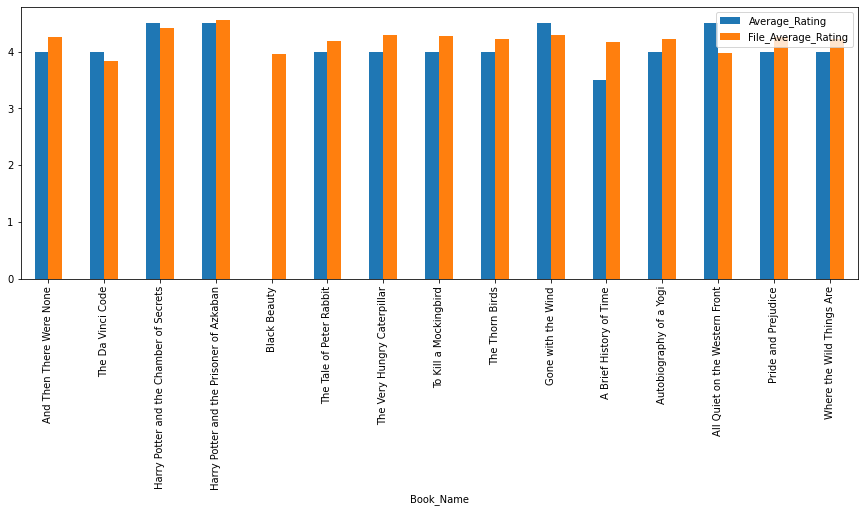

In [35]:
# Using the dataframe retrived, compare the Average rating of both data for the books
Merge_df.plot(x="Book_Name", y=["Average_Rating", "File_Average_Rating"], kind="bar", figsize=(15,5))
plt.show()

In [36]:
# Save the booksdb table for further analysis
booksdb_df = pd.read_sql('SELECT * FROM books_db', conn)
lendb_df = booksdb_df.shape[0]             # Store the number of rows in the database table
lendb_df

81

In [37]:
booksdb_df

,Book_Name,Author,Publisher,Published_Year,ISBN_10,ISBN_13,Page_Count,Average_Rating,Rating_Count,Sale_Country,Sale_Amount,Sale_Currency,Copies_Sold,Language
0,Harry Potter and the Philosopher's Stone,J K Rowling,Bloomsbury Publishing,2014,1408855895,9.781409e+12,352.0,NaN,NaN,None,NaN,None,120,English
1,Harry Potter and the Philosopher's Stone,J K Rowling,Bloomsbury Children's Books,2015,1408866196,9.781409e+12,272.0,5.0,6.0,None,NaN,None,120,English
2,The Little Prince,Antoine de Saint Exupéry,Egmont Books Limited,2005,1405216344,9.781405e+12,83.0,NaN,NaN,None,NaN,None,100,French
3,The Little Prince,Antoine De Saint Exupéry,CreateSpace,2015,151214858X,9.781512e+12,68.0,4.0,1910.0,None,NaN,None,100,French
4,Dream of the Red Chamber,Cao Xueqin,The Floating Press,2009,None,9.789813e+12,2119.0,4.0,1.0,US,5.99,USD,100,Chinese
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,The Power of Positive Thinking,Norman Vincent Peale,Prabhat Prakashan,101-,None,NaN,NaN,NaN,NaN,US,0.99,USD,20,English
77,The Secret,Rhonda Byrne,Simon and Schuster,2011,0731815297,9.780732e+12,216.0,3.0,3596.0,None,NaN,None,20,English
78,Fear of Flying,Erica Jong,Vintage,2015,0099598337,9.780100e+12,352.0,3.5,42.0,None,NaN,None,20,English
79,Dune,Frank Herbert,Penguin,2003,1101658053,9.781102e+12,896.0,4.0,26.0,US,9.99,USD,20,English


In [38]:
# Normalize the data under Copies_Sold 
booksdb_df["Copies_Sold"]= booksdb_df["Copies_Sold"].str.split(" ", n = 1, expand = True)
booksdb_df["Copies_Sold"]= booksdb_df["Copies_Sold"].str.split("–", n = 1, expand = True)
for x in range(0, lendb_df - 1):
    if (booksdb_df["Copies_Sold"][x].find('>') != -1): 
        spl = booksdb_df["Copies_Sold"][x].split('>')
        booksdb_df["Copies_Sold"][x] = spl[1]
booksdb_df.Copies_Sold = pd.to_numeric(booksdb_df.Copies_Sold, errors='coerce')

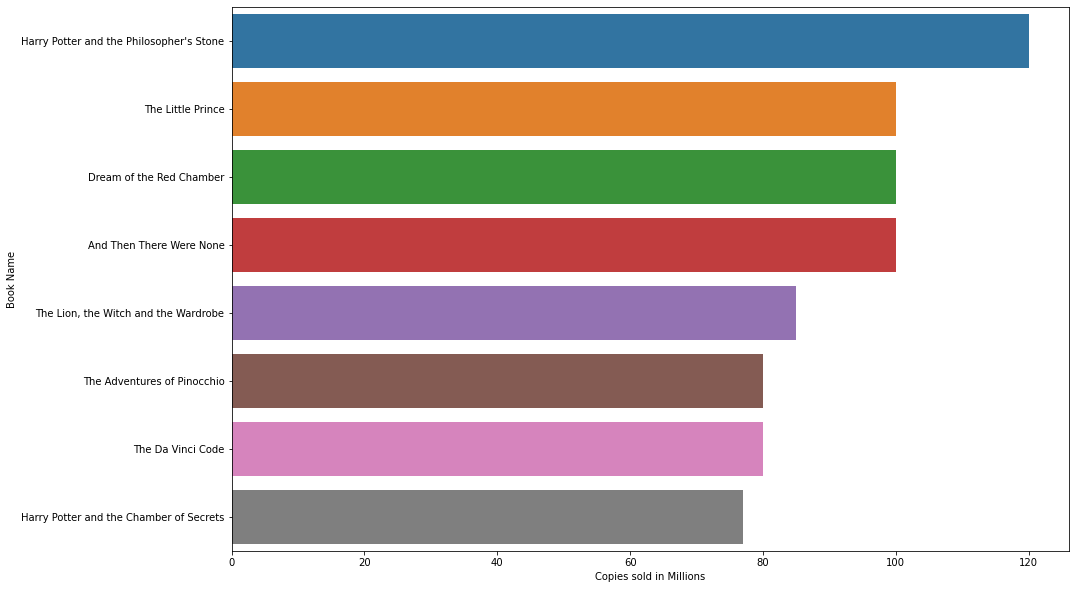

In [39]:
# Top 10 most sold books
most_copies_sold = booksdb_df.sort_values('Copies_Sold', ascending = False).head(10).set_index('Book_Name')
plt.figure(figsize=(15,10))
fig = sns.barplot(most_copies_sold['Copies_Sold'], most_copies_sold.index)
fig.set(xlabel='Copies sold in Millions', ylabel='Book Name')
plt.show()

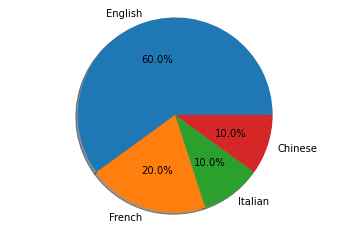

In [40]:
# Pie Chart to confirm the language with books with top 10 records.
grouped = booksdb_df['Language'].head(10).value_counts().reset_index()
grouped = grouped.rename(columns = {'Language' : "count", "index" : 'Language'})

labels = grouped['Language']
sizes = grouped['count']

pic, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True)
ax.axis('equal')
plt.show()

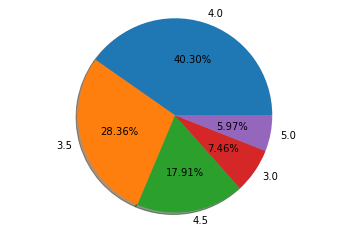

In [41]:
# Pie Chart to confirm the average rating of all books.
grouped = booksdb_df['Average_Rating'].value_counts().reset_index()
grouped = grouped.rename(columns = {'Average_Rating' : "count", "index" : 'Average_Rating'})

labels = grouped['Average_Rating']
sizes = grouped['count']

pic, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.2f%%', shadow=True)
ax.axis('equal')
plt.show()

In [42]:
# The most sales in Dollar amount

# Subset the dataframe with Sale_Currency = 'USD'
Sale_Currency_usd_df = booksdb_df[booksdb_df['Sale_Currency'] == 'USD']
lenusd_df = Sale_Currency_usd_df.shape[0]             # Calculate the number of rows
usd_df = Sale_Currency_usd_df.reset_index()

# Once we have the new dataframe, create a new columnTotal_Sales to the dataframe which would be Sale_Amount * Copies_Sold
for x in range(0, lenusd_df - 1):
    Sale_Currency_usd_df['Total_Sales'] = Sale_Currency_usd_df['Sale_Amount'] * Sale_Currency_usd_df['Copies_Sold']
Sale_Currency_usd_df

,Book_Name,Author,Publisher,Published_Year,ISBN_10,ISBN_13,Page_Count,Average_Rating,Rating_Count,Sale_Country,Sale_Amount,Sale_Currency,Copies_Sold,Language,Total_Sales
4,Dream of the Red Chamber,Cao Xueqin,The Floating Press,2009,None,9.789813e+12,2119.0,4.0,1.0,US,5.99,USD,100.0,Chinese,599.00
9,Harry Potter and the Chamber of Secrets,J K Rowling,Pottermore Publishing,2015,1781100500,9.781781e+12,341.0,4.5,2388.0,US,9.99,USD,77.0,English,769.23
11,Harry Potter and the Prisoner of Azkaban,J K Rowling,Pottermore Publishing,2015,1781100519,9.781781e+12,448.0,4.5,2232.0,US,9.99,USD,65.0,English,649.35
18,You Can Heal Your Life,Louise Hay,"Hay House, Inc",1995,1401922643,9.781402e+12,272.0,4.0,4.0,US,9.99,USD,50.0,English,499.50
20,Lolita,Vladimir Nabokov,Grupo Planeta Spain,2014,8499308996,9.788499e+12,NaN,NaN,NaN,US,4.99,USD,50.0,English,249.50
22,Anne of Green Gables,Lucy Maud Montgomery,Simon and Schuster,2018,1684124034,9.781684e+12,324.0,NaN,NaN,US,4.99,USD,50.0,English,249.50
25,The Eagle Has Landed,Jack Higgins,Open Road Media,2011,1453215085,9.781453e+12,390.0,5.0,2.0,US,11.99,USD,50.0,English,599.50
27,The Hite Report,Shere Hite,Seven Stories Press,2011,1609800354,9.781610e+12,512.0,4.0,1.0,US,14.99,USD,50.0,English,749.50
28,The Ginger Man,J P Donleavy,Open Road + Grove/Atlantic,2010,0802198163,9.780802e+12,368.0,3.5,10.0,US,10.99,USD,50.0,English,549.50
29,The Tale of Peter Rabbit,Beatrix Potter,Penguin,2018,1524790095,9.781525e+12,28.0,4.0,68.0,US,4.99,USD,45.0,English,224.55


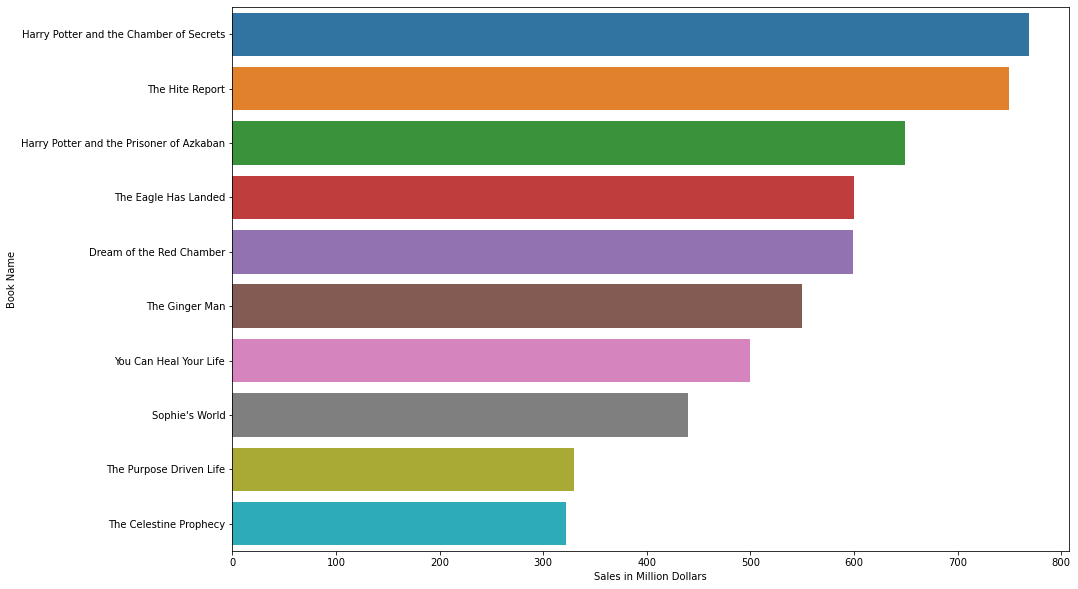

In [43]:
# Now we can plot the bar plot using the new column Total_Sales

most_money_sold = Sale_Currency_usd_df.sort_values('Total_Sales', ascending = False).head(10).set_index('Book_Name')
plt.figure(figsize=(15,10))
fig = sns.barplot(most_money_sold['Total_Sales'], most_money_sold.index)
fig.set(xlabel='Sales in Million Dollars', ylabel='Book Name')
plt.show()

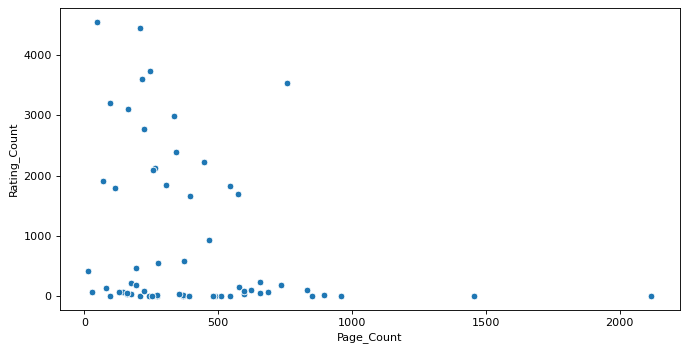

In [44]:
# Scatter plot
## with the increase number of pages the number of rating count is less. So, lesser the book page count, there will be more number of people reading them and providing the ratings.
plt.figure(figsize=(10, 5), dpi=80)
sns.scatterplot(y='Rating_Count', x='Page_Count', data=booksdb_df)

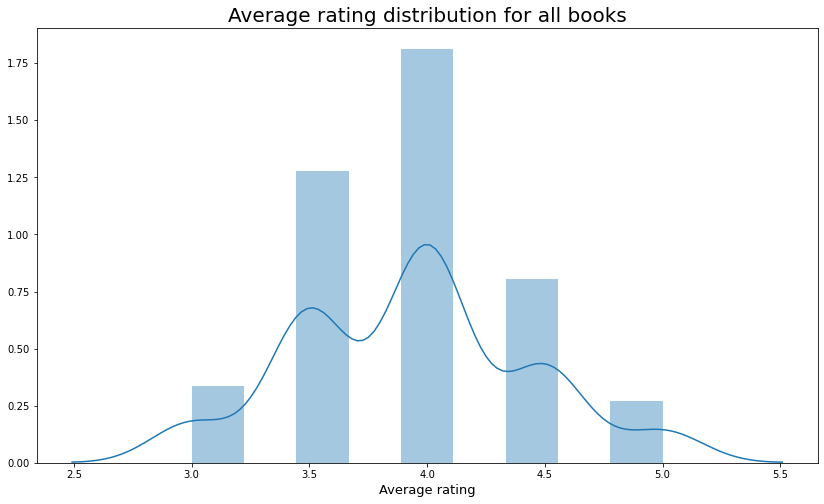

In [45]:
# Check the Average rating distribution for all books

dist = booksdb_df
dist.average_rating = dist.Average_Rating.astype(float)
fig, ax = plt.subplots(figsize=[14,8])
sns.distplot(dist['Average_Rating'],ax=ax)
ax.set_title('Average rating distribution for all books',fontsize=20)
ax.set_xlabel('Average rating',fontsize=13)
plt.show()